In [88]:
from unsupervised_dac import DAC
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

filename = "pineapple.jpg"
img = plt.imread(os.path.join("images_test_unsupervised_dac", filename))
img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
shape = img.shape[:-1]
def define_contour_init(img):
    center = np.flip(np.array(shape)) // 2
    axes = center  # major, minor axes
    angle = 0
    start_angle = 0
    end_angle = 360
    color = 1
    thickness = -1

    # Draw a filled ellipse on the input image
    mask = cv2.ellipse(
        np.zeros(img.shape[:-1]),
        center,
        axes,
        angle,
        start_angle,
        end_angle,
        color,
        thickness,
    ).astype(np.uint8)
    contour = np.squeeze(
        cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0][0]
    )
    return contour, mask
contour_init, mask = define_contour_init(img)


In [90]:
dac = DAC(nb_points = 100,
          n_epochs = 150,
          learning_rate = 1.0,
          clip = 1e-2,
          exponential_decay = 0.999,
          thresh = 1e-5)

In [91]:
contour_init, mask = define_contour_init(img)

In [92]:
contours, energy = dac.predict(img,contour_init)

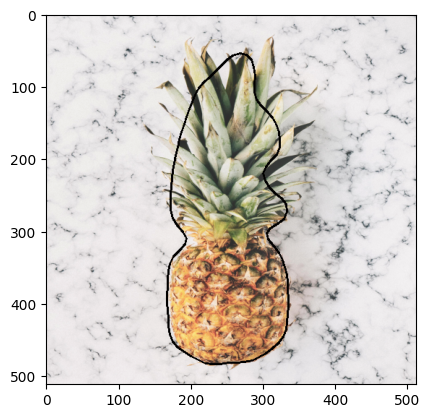

In [93]:
contour_to_display = (np.expand_dims(contours[-1], 1)).astype(int)
new_img = cv2.drawContours((((img/np.max(img))*255).astype(np.uint8)).copy(),
                        [contour_to_display],
                        0,
                        color = 1,
                        thickness=2)
plt.imshow(new_img)
plt.show()

In [96]:
import matplotlib
cmap = matplotlib.cm.get_cmap('cool')

colors = [cmap(u)[:-1] for u in np.linspace(0,1,dac.n_epochs+1)]
colors = (np.array(colors)*255).astype(np.int32).tolist()

tots = []
imgs = []

for i, contour in enumerate(contours):

    contour_to_display = (np.expand_dims(contour, 1)).astype(int)
    
    new_img = cv2.drawContours((((img/np.max(img))*255).astype(np.uint8)).copy(),
                               [contour_to_display],
                               0,
                               color = colors[i],
                               thickness=3)
    plt.imsave(os.path.join('folder_images_paper',filename.split('.')[0]+str(i)+'.png'),new_img)


/tmp/ipykernel_245563/1797348029.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('cool')
